In [1]:
%autosave 0
from biglearn import createNewPred as CP
from biglearn import analyserML as ML
from alys import regression as alysCL
from alys import  save as SV
from graph import rViz 

from pandas import read_csv
import pandas
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import csv
import datetime

Autosave disabled


# Demande de prédiction

In [5]:
CP.predOnProdSet()

Creer une nouvelle source full train (true or false) ?
False
train full dataset/id : dataset/5de90ef052996327d400046e
Nom du fichier full Prod : inc_movies.csv
Model selectioné : ensemble
Nom du champs objectif : target
Nom du fichier exporté : ml_ensemble1.csv
fichier ok
predict-lancée
prediction ok


model ID : ensemble/5dea39ec7811dd6e9f00016f
model name : ensemble


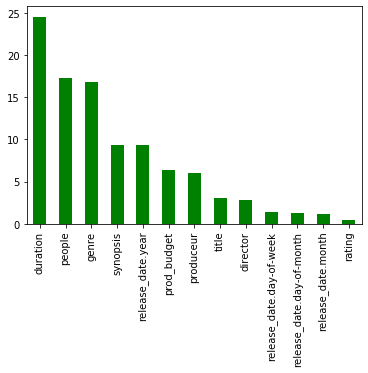

In [6]:
ML.summuary()

In [2]:
df_pred = read_csv('Pred_Files/ml_ensemble1.csv')
df_pred

,imdb_id,title,synopsis,rating,genre,prod_budget,duration,release_date,director,people,produceur,release_date.year,release_date.month,release_date.day-of-month,release_date.day-of-week,pred
0,tt6141246,The Aeronauts,Pilot Amelia Wren (Felicity Jones) and scienti...,TP,"Action, Adventure, Biography, Drama, Romance",0,100,2019-12-20,Tom Harper,"Felicity Jones, Eddie Redmayne, Himesh Patel, ...",Amazon Studios,2019,12,20,5,6.51761
1,tt10080270,En Brazos de un Asesino,Victor (William Levy) is one of the world's mo...,TP,"Romance, Thriller",0,106,2019-12-06,Matías Moltrasio,"William Levy, Alicia Sanz, Adrián Lastra, Robe...","Imakonos, William Levy Entertainment",2019,12,6,5,6.10117
2,tt8613070,Portrait de la jeune fille en feu,On an isolated island in Brittany at the end o...,TP,"Drama, Romance",0,121,2019-09-18,Céline Sciamma,"Noémie Merlant, Adèle Haenel, Luàna Bajrami, V...","Lilies Films, Arte France Cinéma",2019,9,18,3,7.04556
3,tt9204204,Little Joe,"Alice, a single mother, is a dedicated senior ...",TP,"Drama, Sci-Fi",0,105,2019-11-13,Jessica Hausner,"Emily Beecham, Ben Whishaw, Kerry Fox, Kit Connor",Magnolia Pictures,2019,11,13,3,6.86244
4,tt6010976,Midnight Family,"In Mexico City's wealthiest neighborhoods, the...",TP,"Documentary, Action, Crime, Drama",0,81,2019-12-06,Luke Lorentzen,Juan Ochoa,1091,2019,12,6,5,6.51625
5,tt7975244,Jumanji: Next Level,The gang is back but the game has changed. As ...,TP,"Action, Adventure, Comedy, Fantasy",0,123,2019-12-04,Jake Kasdan,"Karen Gillan, Dwayne Johnson, Dania Ramirez, M...",Sony Pictures,2019,12,4,3,7.20298
6,tt10481868,Black Christmas,A group of female students are stalked by a st...,TP,"Horror, Mystery, Thriller",0,92,2019-12-11,Sophia Takal,"Cary Elwes, Imogen Poots, Brittany O'Grady, Al...","Universal Pictures, Blumhouse Productions",2019,12,11,3,5.81385
7,tt5727208,Uncut Gems,A charismatic New York City jeweler always on ...,TP,"Comedy, Crime, Drama, Mystery, Thriller",0,135,2019-12-25,Benny Safdie,"Adam Sandler, Julia Fox, Kevin Garnett, The We...",A24,2019,12,25,3,7.16529
8,tt5827916,Une vie cachée,"The Austrian Blessed Franz Jägerstätter, a con...",TP,"Biography, Drama, War",0,173,2019-12-11,Terrence Malick,"August Diehl, Valerie Pachner, Michael Nyqvist...",Fox Searchlight Pictures,2019,12,11,3,7.51657
9,tt1780967,Seberg,Inspired by real events about the French New W...,TP,"Biography, Drama, Thriller",0,96,2019-12-13,Jean Seberg,"Zazie Beetz, Kristen Stewart, Margaret Qualley...","Phreaker Films, Bradley Pilz Productions",2019,12,13,5,6.29013


# Suivi de la tendance

In [3]:
df_ann = read_csv("Rapport/suivi_ensemble.csv")

def Follow() :
    # creation d'un df temporaire pour plus de lisibilité
    df_temp = pandas.DataFrame()
    col = ('imdb_id','title','target')
    
    for i in col :
        df_temp[i] = df_ann[i]
    df_temp['pred'] = df_pred['pred']

    # je supprime de l'analyse les films qui ont pas encore de notes    
    ro = 0    
    for i in df_temp['target']:
        if i == 0 :
            df_temp = df_temp.drop(ro)
        ro +=1        
    
    df_temp['pred'] =  round(df_temp['pred'],2)  
    
    # fonction pour une analyse des erreurs
    alysCL.regr(df_temp)
    return df_temp
    
    
board = Follow()
board

nom colonne prediction : pred
nom colonne output : target
MAPE =  14.06


,imdb_id,title,target,pred,pourcerror,errorabs,mape,RMSE
0,tt6141246,The Aeronauts,6.6,6.52,-0.012121,0.01,14.06,1.005184
1,tt10080270,En Brazos de un Asesino,6.1,6.10,0.000000,0.00,NaN,NaN
2,tt8613070,Portrait de la jeune fille en feu,8.3,7.05,-0.150602,0.15,NaN,NaN
3,tt9204204,Little Joe,5.8,6.86,0.182759,0.18,NaN,NaN
4,tt6010976,Midnight Family,7.7,6.52,-0.153247,0.15,NaN,NaN
5,tt7975244,Jumanji: Next Level,7.0,7.20,0.028571,0.03,NaN,NaN
6,tt10481868,Black Christmas,3.2,5.81,0.815625,0.82,NaN,NaN
7,tt5727208,Uncut Gems,8.1,7.17,-0.114815,0.11,NaN,NaN
8,tt5827916,Une vie cachée,7.7,7.52,-0.023377,0.02,NaN,NaN
9,tt1780967,Seberg,4.7,6.29,0.338298,0.34,NaN,NaN


In [4]:
sh = board.shape[0]
ma = board.loc[0,'mape']
dt = datetime.datetime.now()
d_t = dt.strftime("%d")
m_t = dt.strftime("%b")

print(f"{d_t}-{m_t} : mape =  {ma} ---- {sh}/17 films")

24-Dec : mape =  14.06 ---- 17/17 films


(array([5., 4., 0., 2., 4., 0., 1., 0., 0., 1.]),
 array([0.   , 0.261, 0.522, 0.783, 1.044, 1.305, 1.566, 1.827, 2.088,
        2.349, 2.61 ]),
 <a list of 10 Patch objects>)

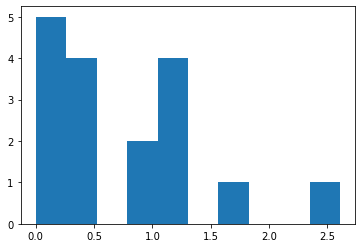

In [9]:
err_hist = np.abs(board['target'] - board['pred'])
plt.hist(err_hist)